In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct

In [5]:
# took sqlite file out of resources
engine = create_engine("sqlite:///hawaii.sqlite") 

In [6]:
# reflect an existing database into a new model...refer to 02-Activity-6
Base = automap_base() 



In [7]:
# reflect the tables (reason for error hawaii.sqlite is not in resources anymore)
Base.prepare(engine, reflect=True)  

In [8]:
# We can view all of the classes that automap found
Base.classes.keys() 

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine) 

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


In [12]:
# NEED TO FIND FINAL POINT IN THE DATAFRAME IN ORDER TO GO ONE YEAR BACK (RESULT SHOULD BE 8/23/2017 ACCORDING TO CSV RAW)
# last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# last_date

# Calculate the date 1 year ago from the last data point in the database (02 Activity 10)
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365) 
print("Query Date: ", query_date) 



Query Date:  2016-08-23


In [13]:
# Perform a query to retrieve the data and precipitation scores
prec_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()  

# Save the query results as a Pandas DataFrame and set the index to the date column
prec_df = pd.DataFrame(prec_query, columns=['Date', 'Precipitation'])
prec_df.set_index('Date', inplace=True)

# Sort the dataframe by date...this just means sort index
prec_df = prec_df.sort_index() 
prec_df


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


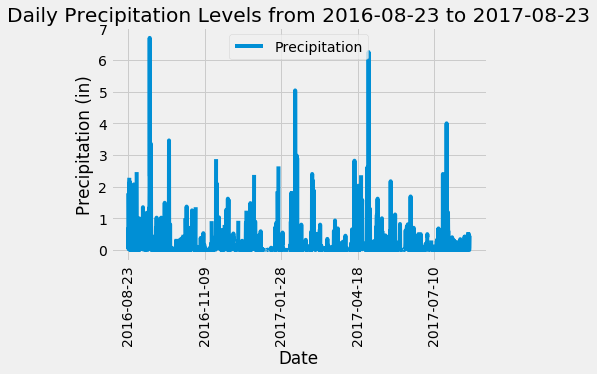

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data (emoji exercise, No subplots needed)  
ax = prec_df.plot(title="Daily Precipitation Levels from 2016-08-23 to 2017-08-23", rot=90)  
ax.set_ylabel("Precipitation (in)")
plt.show() 

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df.describe() 

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).count() 
station_count

9

In [35]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order...in order to show descending you have to group by func.count
# https://stackoverflow.com/questions/1052148/group-by-count-function-in-sqlalchemy
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all() 
active_stations


 


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# using ID 'USC00519281' as this was the most active station
# https://stackoverflow.com/questions/11830980/sqlalchemy-simple-example-of-sum-average-min-max

station_query = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').all()
station_query

[(54.0, 85.0, 71.66378066378067)]

In [38]:
# Choose the station with the highest number of temperature observations. Same as above: 'USC00519281'
# Query the last 12 months of temperature observation data for this station 

top_station = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.date >= query_date).\
            filter(Measurement.station == 'USC00519281').all() 

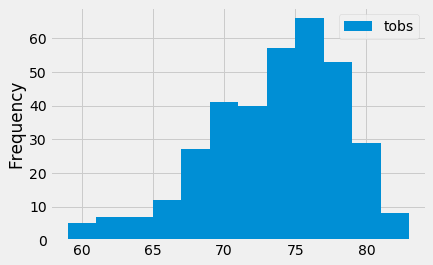

In [41]:
# plot the results as a histogram, bins = 12
top_station_df = pd.DataFrame(top_station) 

hist = top_station_df.plot(kind='hist', bins=12)


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
